# One-Legged Hopper

In this set, we're going to spend some time with the [one-legged hopper](http://www.ai.mit.edu/projects/leglab/robots/3D_hopper/3D_hopper.html). This system (which is discussed in great detail in [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6313238) -- you can reference that paper for some parts of this set!) enables extremely dynamic walking behavior that bounces between *stance phases* when the foot is on the ground, and *flight phases* when the foot is in the air. The system is dramatically underactuated in both phases, but as you'll see in this problem set, it can still be stabilized!

## Dynamics
The (planar) one-legged hopper consists of a body with mass $m_b$ and a foot with a mass $m_f$, with the connection between the foot and the body being a single (actuated, torque-controlled) pin joint, and the leg being springy with controllable spring constant.

<p align="center">
  <img src="./planar_hopper.png" width="350"/>
</p>

The planar one-legged hopper, diagramed above, has state

$$ \mathbb{x} = \left[ \begin{array} \\ q \\ \dot q \end{array}\right] \ \ \ q = \left[\begin{array}\\ x \\ z \\ \theta \\ \alpha \\ l\end{array}\right] $$

for floating base coordinates $x, z, \theta$, hip angle $\alpha$, and leg extension $l$ limited to $\left[-\infty, l_{max}\right]$. This joint limit is implemented with a highly damped one-sided (i.e., only active when the limit is exceeded) spring. The "springiness" in the leg is represented by a force $f_{spring} = K_l * (l_{rest} - l)$ that pushes the foot back to full extension when it is compressed. **The system has two control inputs: instantaneous control of $l_{rest}$, and direct torque control of the leg angle.**

This system is hybrid due to the joint limit and ground contact, and (usually) oscillates between two contact modes:

1) **Flight**: When the foot is not in contact with the ground and the leg is fulled extended to $l = l_{max}$ (these usually occur simultaneously, as in flight there's nothing stopping the leg from passively extending). In this mode, the whole assembly flies through the air under the influence of gravity.

2) **Stance**: When the foot is in contact with the ground, a ground reaction force (also represented with a highly damped one-sided spring) pushes the foot out of collision with the ground.

## Controlling the Hopper

As discussed in lecture, one might think about controlling this system by separating it into three separate control problems:

1) Controlling the hopping height of the body by pushing off the ground while in stance phase

2) Controlling the horizontal velocity of the body by choosing where to place the foot during the next stance phase (which requires exerting torque during flight phase to aim the leg)

3) Controlling the angular velocity of the body by applying a torque to the leg while in stance phase

In this section we'll play with a planar model of the 1D hopper. **We've supplied a controller that will take care of regulating the hopping height (using Raibert's very simple controller) by modifying the spring rest length.**


## What you have to do

Peruse the provided 1d hopper controller class in *hopper_2d.py* and understand what it is currently accomplishing. The *Hopper2dController* system implements a controller for the planar 2d hopper, and the *Simulate2dHopper* function loads in the 2d hopper from a robot description file, hooks up the controller, and runs a simulation. The controller calculates its output in *_DoCalcVectorOutput*, but dispatches its decision making to two other methods: 

- *ChooseSpringRestLength* picks the instantaneous rest length of the spring. We've written this for you, implementing something like Raibert's original hopper height controller.
- *ChooseThighTorque* picks a leg angle torque (which directly controls $\ddot \alpha$). You have to write this one!

**Fill in ChooseThighTorque with a leg angle torque controller that lateral velocity to the desired lateral velocity, and also keeps the body steady ($\theta = 0$).** Comment your code thoroughly explaining what your controller is doing -- we reserve the right to dock points for functional but seemingly arbitrary code! The code snippets below are here to help you test your system (feel free to change the initial condition, the simulation duration, the lateral velocity target, the xlim and ylim of the visualizer, etc...). As usual, a battery of tests will be used to help validate your system -- feel free to peruse (but don't modify) *test_set_4.py* to see the conditions we're testing.

### Advice:
- While you're very welcome to explore (any method that passes the tests is technically OK!), I recommend implementing one of the three controllers described in Section IV of [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6313238&tag=1). In particular, the 3rd controller ("Servo Attitude") we found to be particularly effective and simple to implement. Like many "intuitive"-style controllers, it has a handful of parameters that must be estimated (e.g. the typical duration of flight and stance phases), which you are free to infer from looking at simulation runs and hard-coding.
- Gain tuning will undoubtedly be a stumbling block here. Start as simple as you can: for example, focus first on controlling lateral velocity to 0 (i.e. just maintain balance), then controlling lateral velocity to reasonable speeds, and then finally controlling the body angle to near zero. Only try to tune one number at a time!
- Friction with the ground is *not infinite*, so if you see the foot slipping, fix your foot placement or limit your leg angle torques.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


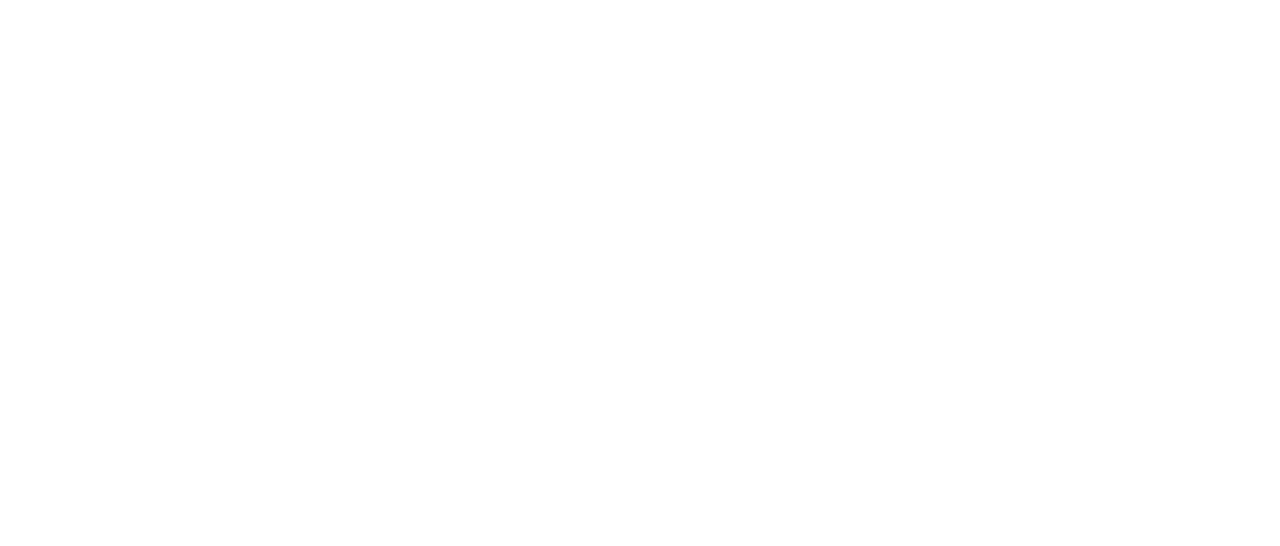

t:  0.0
desired_liftoff_angle
0.06507978880423179
0.013143345952811943
controller: 0.6571672976405971	 beta: 0.0	 beta_desired: 0.013143345952811943
controller: 0.6568416968897913	 beta: 1.5882963453940392e-07	 beta_desired: 0.013143345952811943
controller: 0.6565083239250894	 beta: 4.764063339446389e-07	 beta_desired: 0.013143345952811943
controller: 0.6561671960439093	 beta: 9.526411046718212e-07	 beta_desired: 0.013143345952811943
controller: 0.6558183279892453	 beta: 1.5874399320465818e-06	 beta_desired: 0.013143345952811943
controller: 0.6554617324980628	 beta: 2.380704881281683e-06	 beta_desired: 0.013143345952811943
controller: 0.6550974207465635	 beta: 3.3323349544375215e-06	 beta_desired: 0.013143345952811943
controller: 0.6547254027114295	 beta: 4.44222675026475e-06	 beta_desired: 0.013143345952811943
controller: 0.6543456874624332	 beta: 5.710274965216311e-06	 beta_desired: 0.013143345952811943
controller: 0.6539582833988871	 beta: 7.1363727668988736e-06	 beta_desired: 0.013

controller: -0.5326974183701948	 beta: 0.023657185593987856	 beta_desired: 0.013143345952811943
controller: -0.5326089303870368	 beta: 0.023660559715123583	 beta_desired: 0.013143345952811943
controller: -0.5325140563442223	 beta: 0.023663805260600967	 beta_desired: 0.013143345952811943
controller: -0.5324128004701979	 beta: 0.023666922253323286	 beta_desired: 0.013143345952811943
controller: -0.5323051670683995	 beta: 0.023669910717734426	 beta_desired: 0.013143345952811943
controller: -0.5321911605171643	 beta: 0.02367277067981786	 beta_desired: 0.013143345952811943
controller: -0.532070785269642	 beta: 0.02367550216709559	 beta_desired: 0.013143345952811943
controller: -0.531944045853705	 beta: 0.02367810520862706	 beta_desired: 0.013143345952811943
controller: -0.5318109468718573	 beta: 0.023680579835008087	 beta_desired: 0.013143345952811943
controller: -0.5316714930011424	 beta: 0.023682926078369713	 beta_desired: 0.013143345952811943
controller: -0.5315256889930523	 beta: 0.0236

controller: 0.0	 beta: 0.030101151291937474	 beta_desired: None
controller: 0.0	 beta: 0.03011736087978647	 beta_desired: None
controller: 0.0	 beta: 0.030133275104147633	 beta_desired: None
controller: 0.0	 beta: 0.030148892560763155	 beta_desired: None
controller: 0.0	 beta: 0.030164211858859258	 beta_desired: None
controller: 0.0	 beta: 0.03017923162131395	 beta_desired: None
controller: 0.0	 beta: 0.030193950484823602	 beta_desired: None
controller: 0.0	 beta: 0.03020836710006809	 beta_desired: None
controller: 0.0	 beta: 0.030222480131874722	 beta_desired: None
controller: 0.0	 beta: 0.03023628825938076	 beta_desired: None
controller: 0.0	 beta: 0.030249790176194547	 beta_desired: None
controller: 0.0	 beta: 0.03026298459055521	 beta_desired: None
controller: 0.0	 beta: 0.03027587022549095	 beta_desired: None
controller: 0.0	 beta: 0.030288445818975874	 beta_desired: None
controller: 0.0	 beta: 0.030300710124085285	 beta_desired: None
controller: 0.0	 beta: 0.03031266190914946	 be

0.017793889206030724
controller: 0.5684351582289697	 beta: 0.007825837092207785	 beta_desired: 0.017793889206030724
controller: 0.5698982480564626	 beta: 0.0077909611691027525	 beta_desired: 0.017793889206030724
controller: 0.5713548818557608	 beta: 0.007756225325195747	 beta_desired: 0.017793889206030724
controller: 0.5728048633740619	 beta: 0.007721629388936083	 beta_desired: 0.017793889206030724
controller: 0.5742480238013801	 beta: 0.007687173275303572	 beta_desired: 0.017793889206030724
controller: 0.5756842179059394	 beta: 0.007652856972196459	 beta_desired: 0.017793889206030724
controller: 0.57711332066909	 beta: 0.007618680528792861	 beta_desired: 0.017793889206030724
controller: 0.5785352243676786	 beta: 0.007584644045619308	 beta_desired: 0.017793889206030724
controller: 0.5799498360532863	 beta: 0.007550747666091153	 beta_desired: 0.017793889206030724
controller: 0.5813570753807574	 beta: 0.007516991569318577	 beta_desired: 0.017793889206030724
controller: 0.582756872742263	

controller: -0.5509657631172228	 beta: 0.02826360975497352	 beta_desired: 0.017793889206030724
controller: -0.5513800918805367	 beta: 0.028277216615672743	 beta_desired: 0.017793889206030724
controller: -0.5517875652419172	 beta: 0.028290690369214114	 beta_desired: 0.017793889206030724
controller: -0.5521881815928992	 beta: 0.02830403091723057	 beta_desired: 0.017793889206030724
controller: -0.5525819394085605	 beta: 0.02831723816301036	 beta_desired: 0.017793889206030724
controller: -0.5529688372474997	 beta: 0.02833031201149744	 beta_desired: 0.017793889206030724
controller: -0.5533488737518149	 beta: 0.02834325236929182	 beta_desired: 0.017793889206030724
controller: -0.5537220476470774	 beta: 0.02835605914464988	 beta_desired: 0.017793889206030724
controller: -0.5540883577423088	 beta: 0.02836873224748468	 beta_desired: 0.017793889206030724
controller: -0.5544478029299544	 beta: 0.02838127158936627	 beta_desired: 0.017793889206030724
controller: -0.5548003821858557	 beta: 0.0283936

controller: 0.4504830097549277	 beta: 0.008831567941591113	 beta_desired: 0.017793889206030724
controller: 0.45031924621519537	 beta: 0.008830493218179788	 beta_desired: 0.017793889206030724
controller: 0.4501501262267954	 beta: 0.00882952720508991	 beta_desired: 0.017793889206030724
controller: 0.44997565441723797	 beta: 0.008828669861494692	 beta_desired: 0.017793889206030724
controller: 0.44979583547639734	 beta: 0.008827921145275378	 beta_desired: 0.017793889206030724
controller: 0.44961067415642536	 beta: 0.008827281013022374	 beta_desired: 0.017793889206030724
controller: 0.449420175271664	 beta: 0.0088267494200364	 beta_desired: 0.017793889206030724
controller: 0.44922434369855685	 beta: 0.008826326320329647	 beta_desired: 0.017793889206030724
controller: 0.44902318437556066	 beta: 0.008826011666626962	 beta_desired: 0.017793889206030724
controller: 0.4488167023030558	 beta: 0.008825805410367026	 beta_desired: 0.017793889206030724
controller: 0.4486049025432559	 beta: 0.00882570

controller: 0.0	 beta: 0.020796308983955833	 beta_desired: None
controller: 0.0	 beta: 0.020802188603540175	 beta_desired: None
controller: 0.0	 beta: 0.020807888790994863	 beta_desired: None
controller: 0.0	 beta: 0.02081340805382101	 beta_desired: None
controller: 0.0	 beta: 0.020818744898765864	 beta_desired: None
controller: 0.0	 beta: 0.02082389783194427	 beta_desired: None
controller: 0.0	 beta: 0.02082886535896122	 beta_desired: None
controller: 0.0	 beta: 0.020833645985035378	 beta_desired: None
controller: 0.0	 beta: 0.020838238215123754	 beta_desired: None
controller: 0.0	 beta: 0.020842640554047352	 beta_desired: None
controller: 0.0	 beta: 0.020846851506617834	 beta_desired: None
controller: 0.0	 beta: 0.020850869577765163	 beta_desired: None
controller: 0.0	 beta: 0.02085469327266633	 beta_desired: None
controller: 0.0	 beta: 0.020858321096874917	 beta_desired: None
controller: 0.0	 beta: 0.02086175155645175	 beta_desired: None
controller: 0.0	 beta: 0.020864983158096415	 

0.034562367779923005
controller: 2.315552895248943	 beta: -0.010957687422166146	 beta_desired: 0.034562367779923005
controller: 2.3153943767861245	 beta: -0.010976902844937693	 beta_desired: 0.034562367779923005
controller: 2.3152084510890596	 beta: -0.01099555890339917	 beta_desired: 0.034562367779923005
controller: 2.3149950374698265	 beta: -0.01101365583184001	 beta_desired: 0.034562367779923005
controller: 2.3147540727811475	 beta: -0.011031193828031718	 beta_desired: 0.034562367779923005
controller: 2.3144855085985774	 beta: -0.011048173061300421	 beta_desired: 0.034562367779923005
controller: 2.314189308828372	 beta: -0.011064593679235638	 beta_desired: 0.034562367779923005
controller: 2.3138654476842353	 beta: -0.011080455813248472	 beta_desired: 0.034562367779923005
controller: 2.313513907981576	 beta: -0.011095759583162126	 beta_desired: 0.034562367779923005
controller: 2.3131346797036203	 beta: -0.011110505100991087	 beta_desired: 0.034562367779923005
controller: 2.3127277587

In [74]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import hopper_2d
import numpy as np
import matplotlib.pyplot as plt
import math

# x0 = np.zeros(10)
# x0[1] = 1.5
# x0[4] = 0.5
# x0[5] = 0.1

lift_off_plus_state = np.zeros(10)
lift_off_plus_state[1] = 3.5 # foot just touching the ground
lift_off_plus_state[3] = 0.0 # alpha
lift_off_plus_state[4] = 0.5 # l distance
# lift_off_plus_state[0+5] = 0.25 # xd
hopper, controller, state_log, animation = hopper_2d.Simulate2dHopper(x0 = lift_off_plus_state,
                           
                                                                      duration=3.0,
                               desired_lateral_velocity = 0.5,
                               print_period = 1.0)
print('Done')

In [75]:
from IPython.display import HTML
HTML(animation.to_jshtml())

<IPython.core.display.Javascript object>


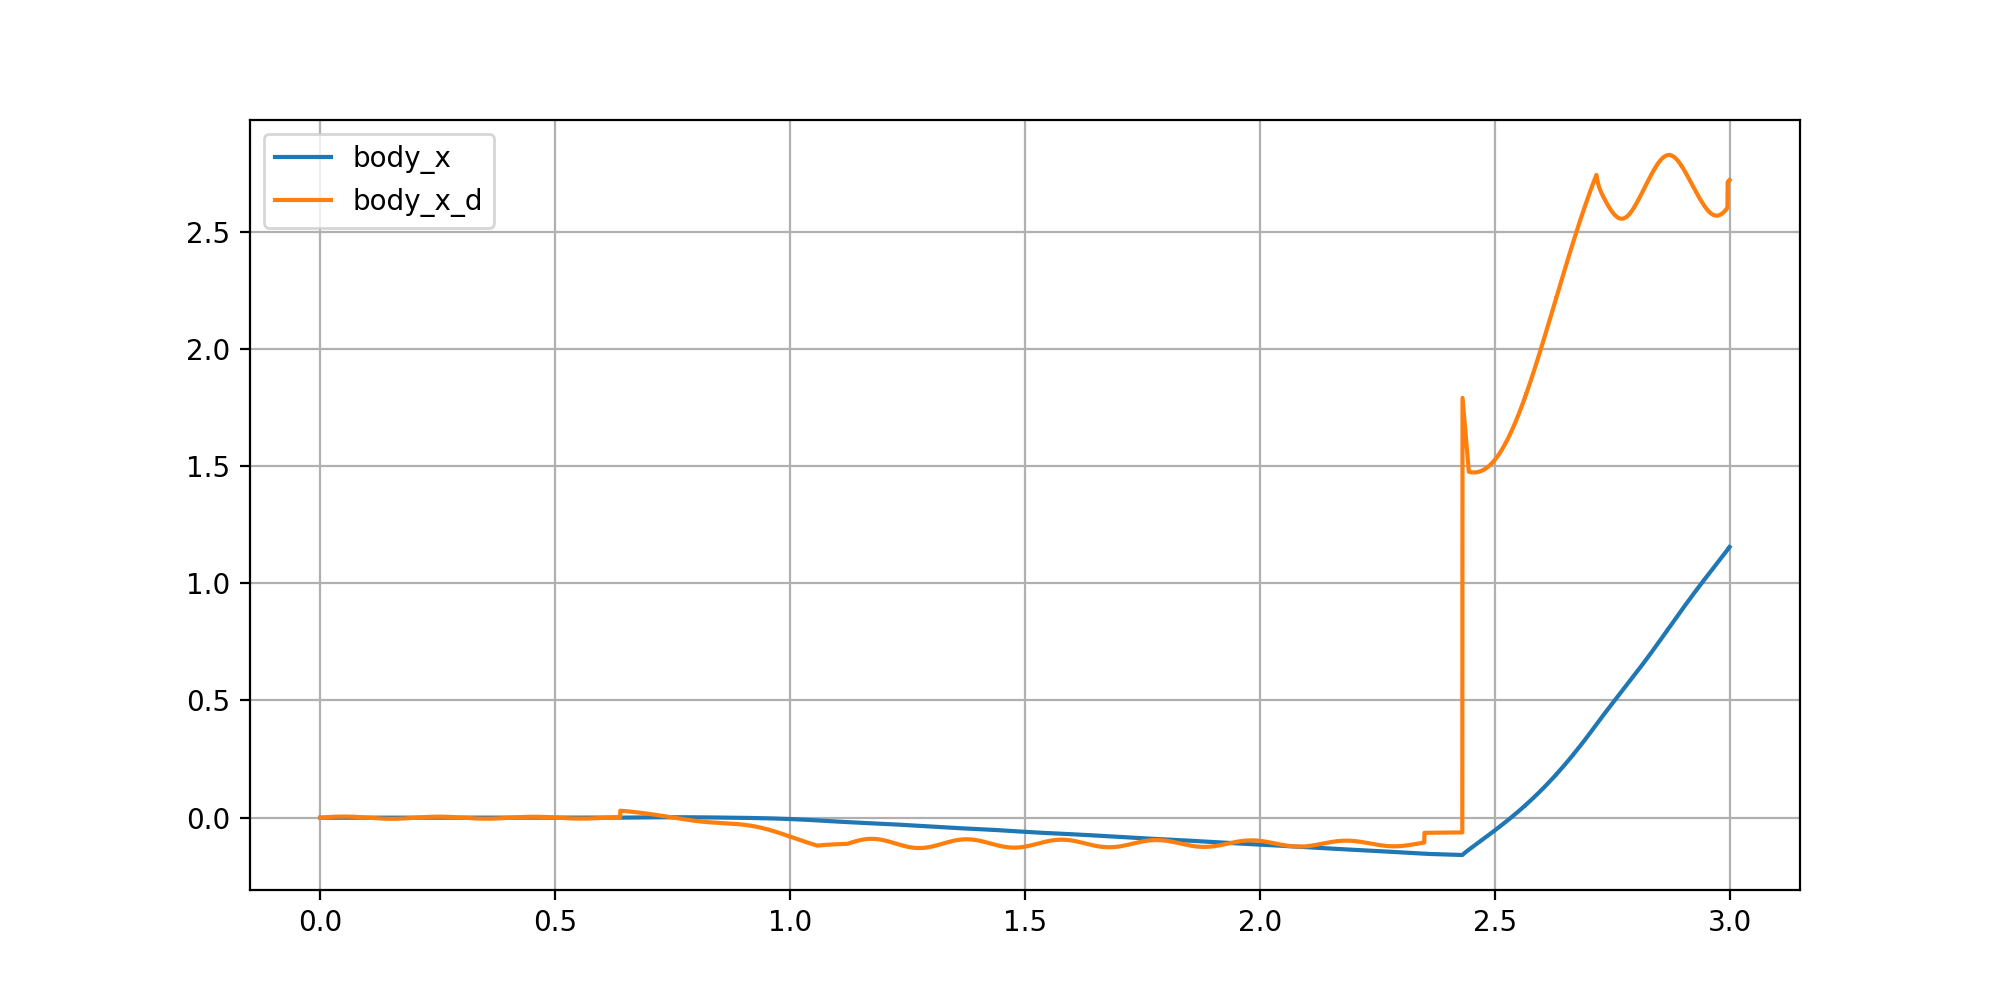

<IPython.core.display.Javascript object>


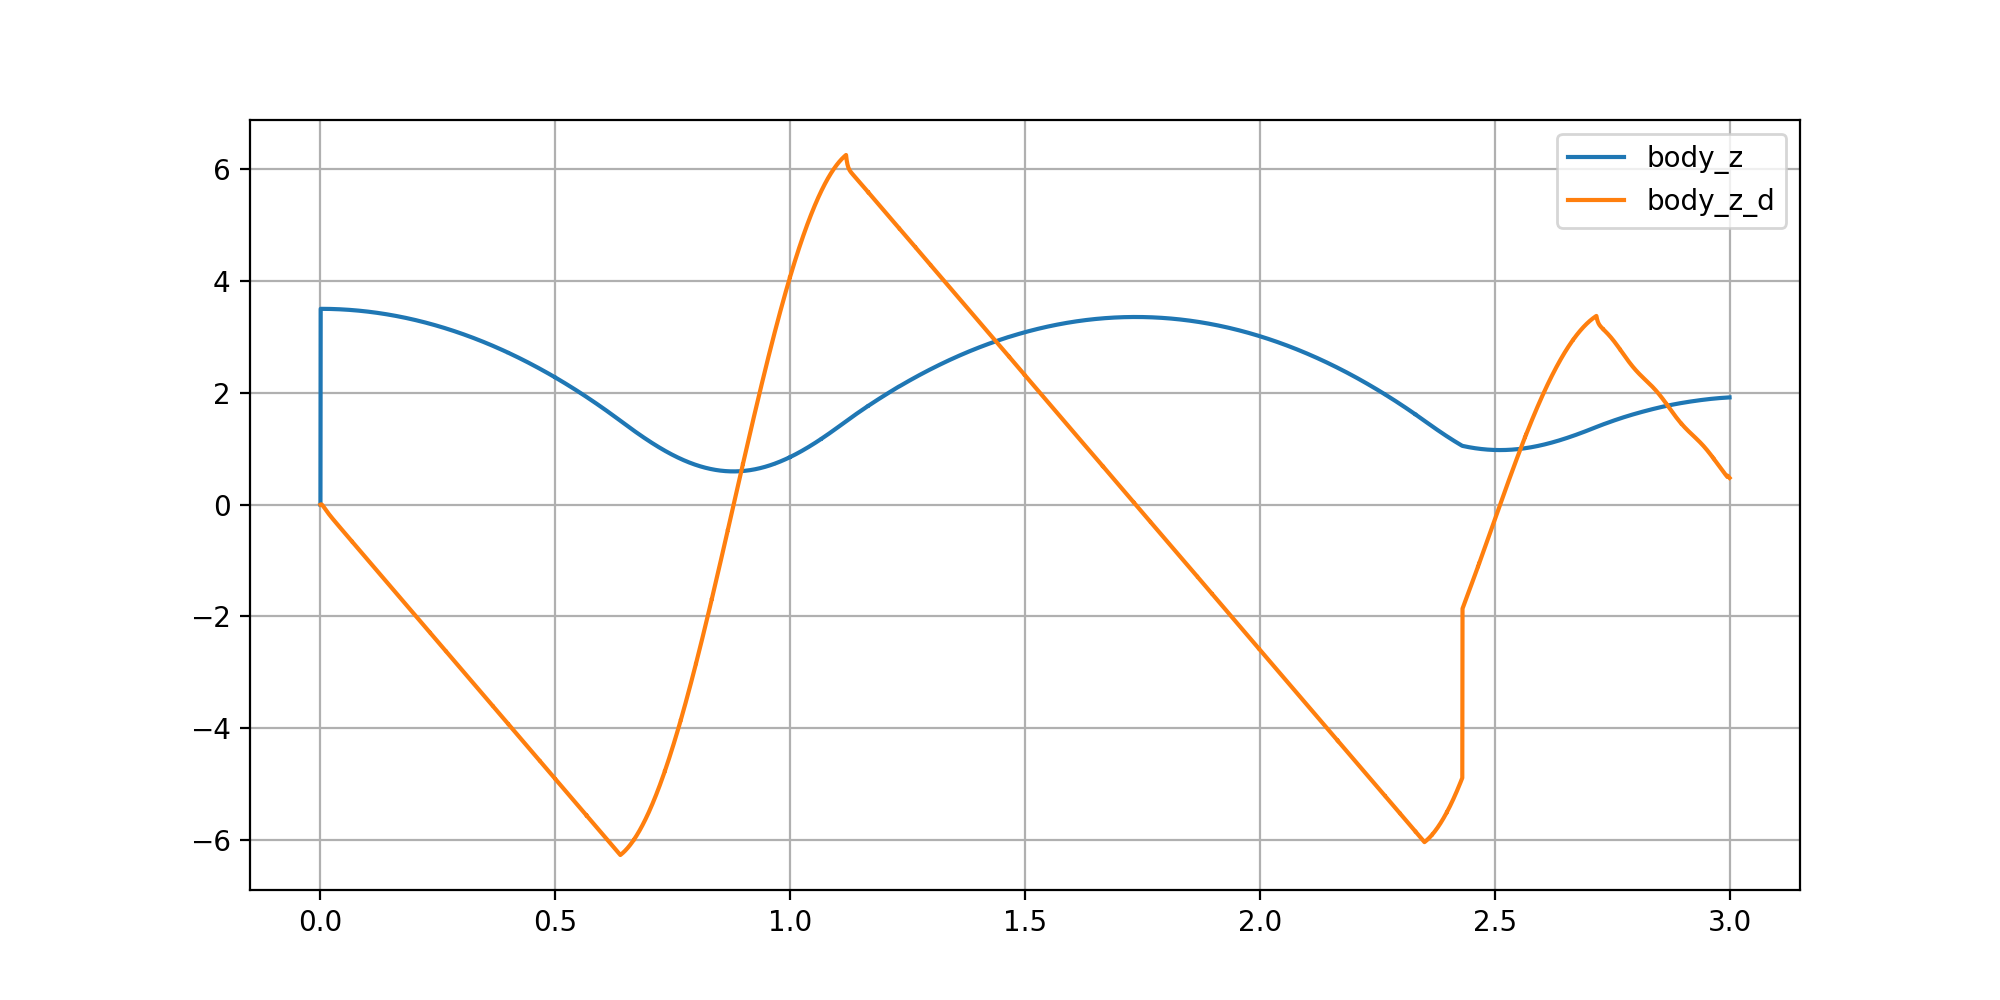

<IPython.core.display.Javascript object>


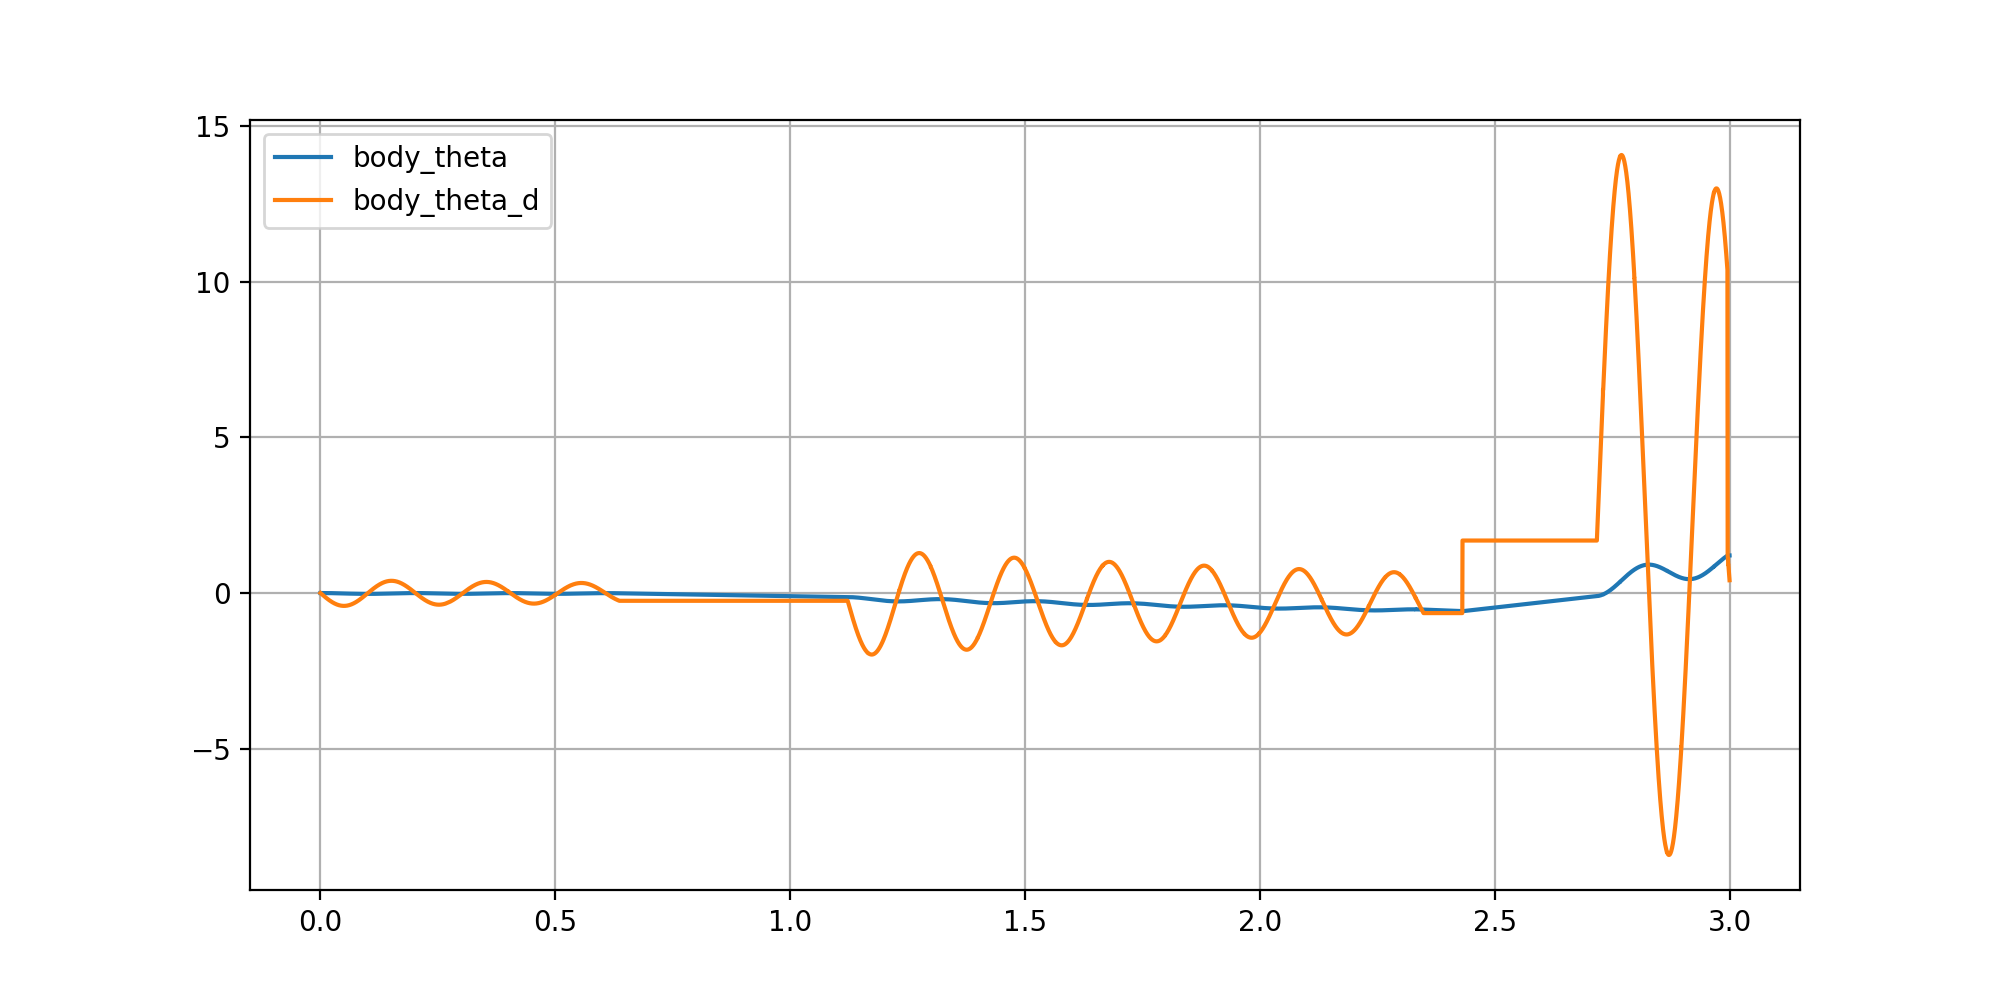

<IPython.core.display.Javascript object>


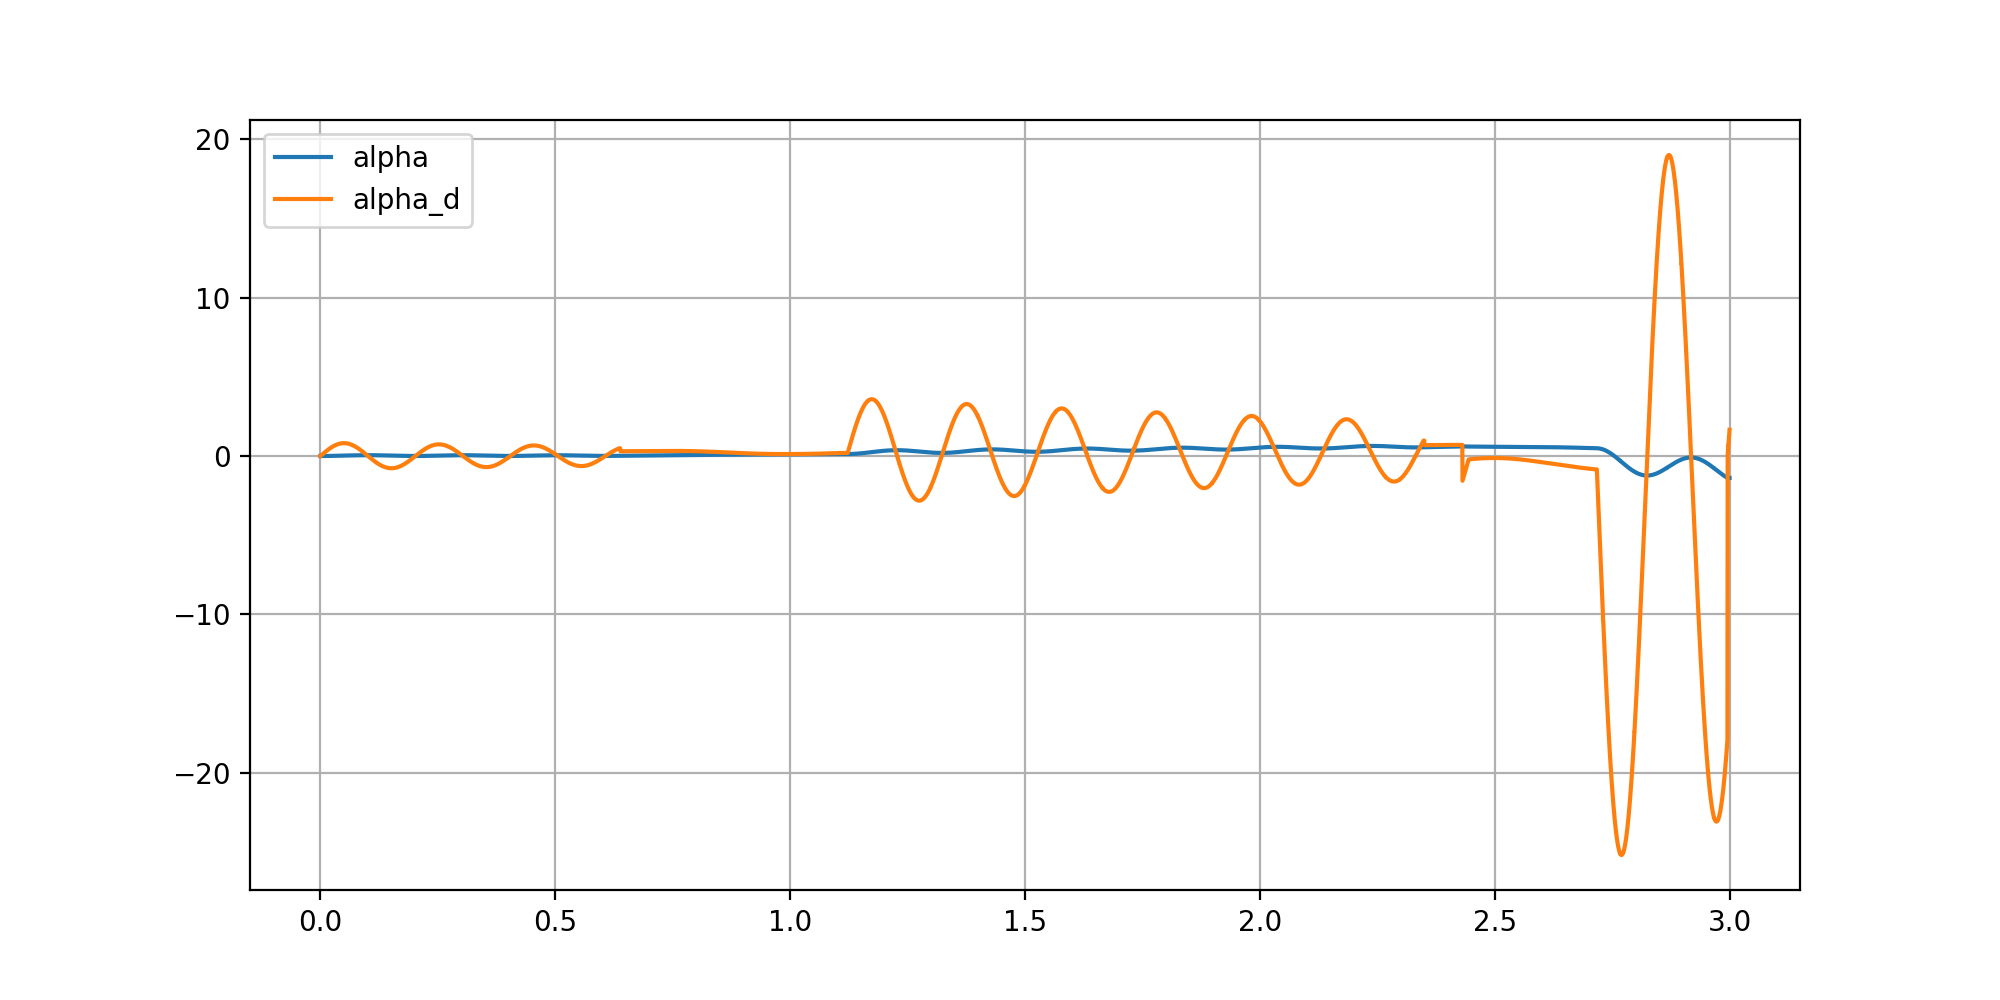

<IPython.core.display.Javascript object>


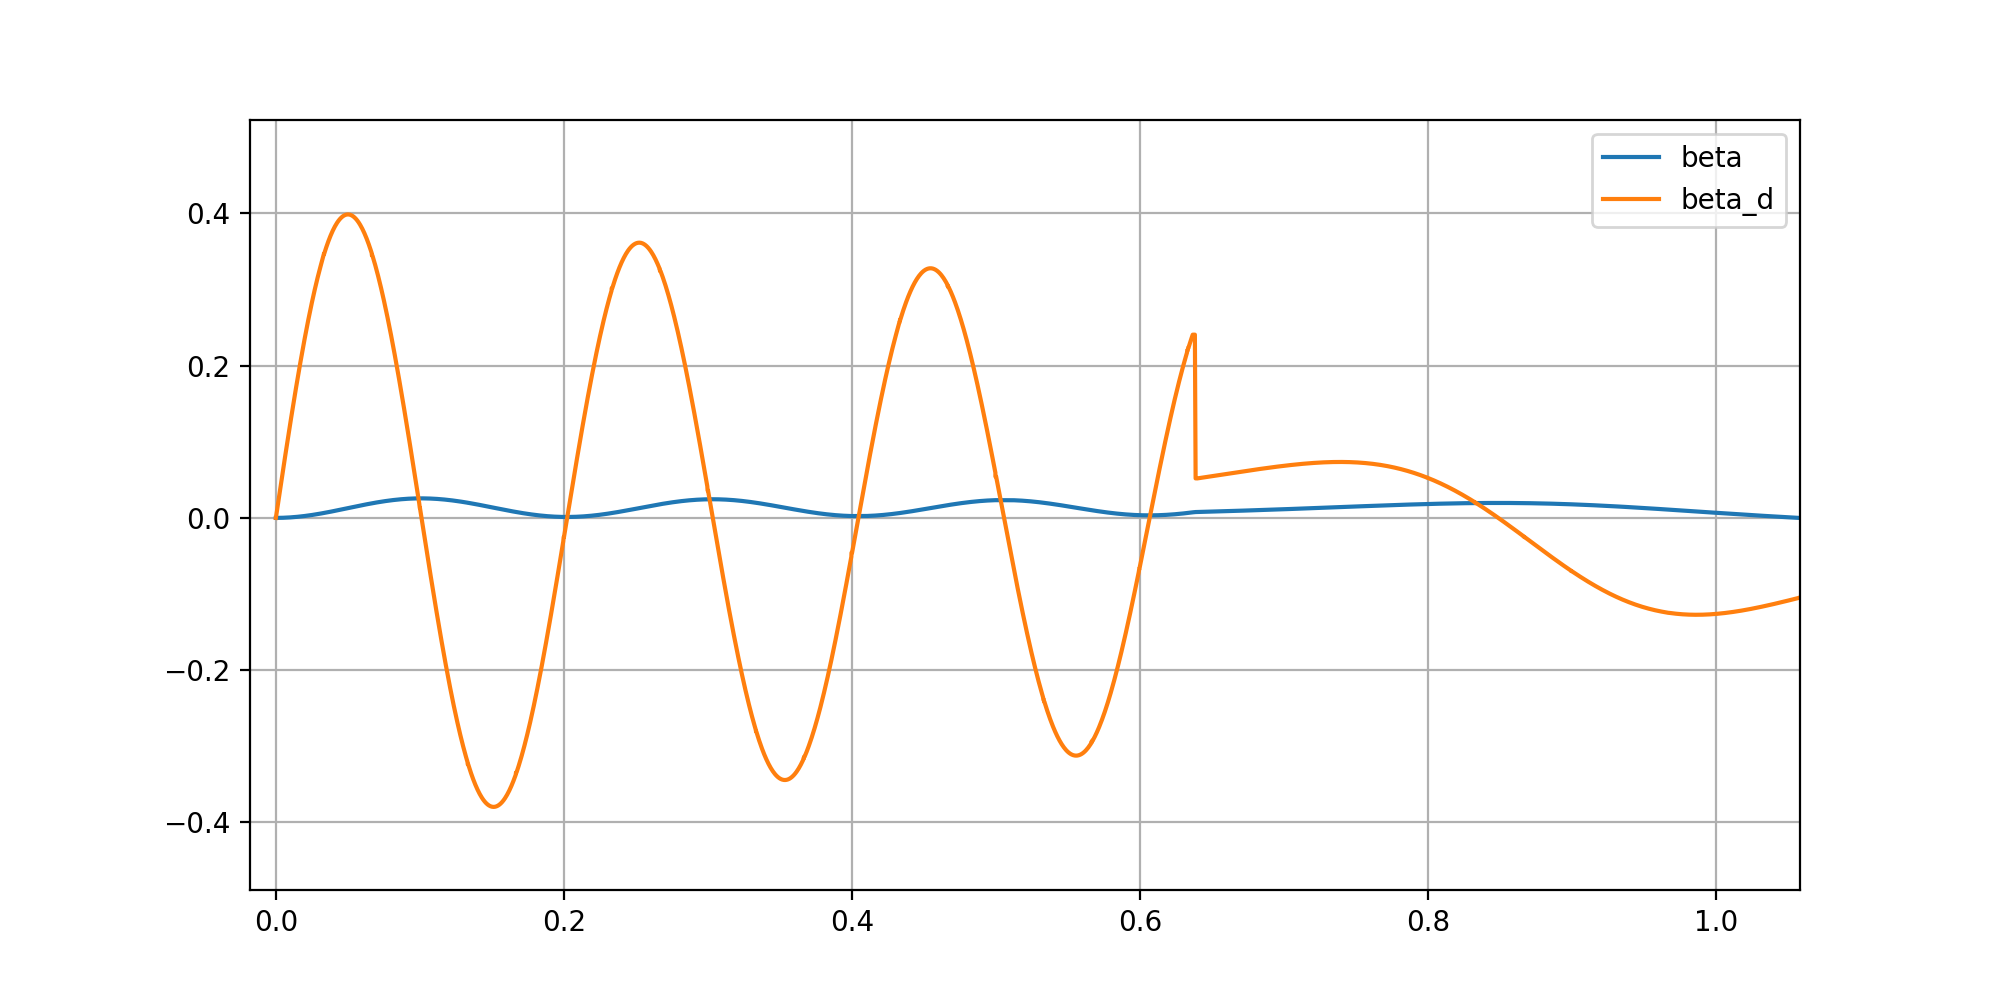

<IPython.core.display.Javascript object>


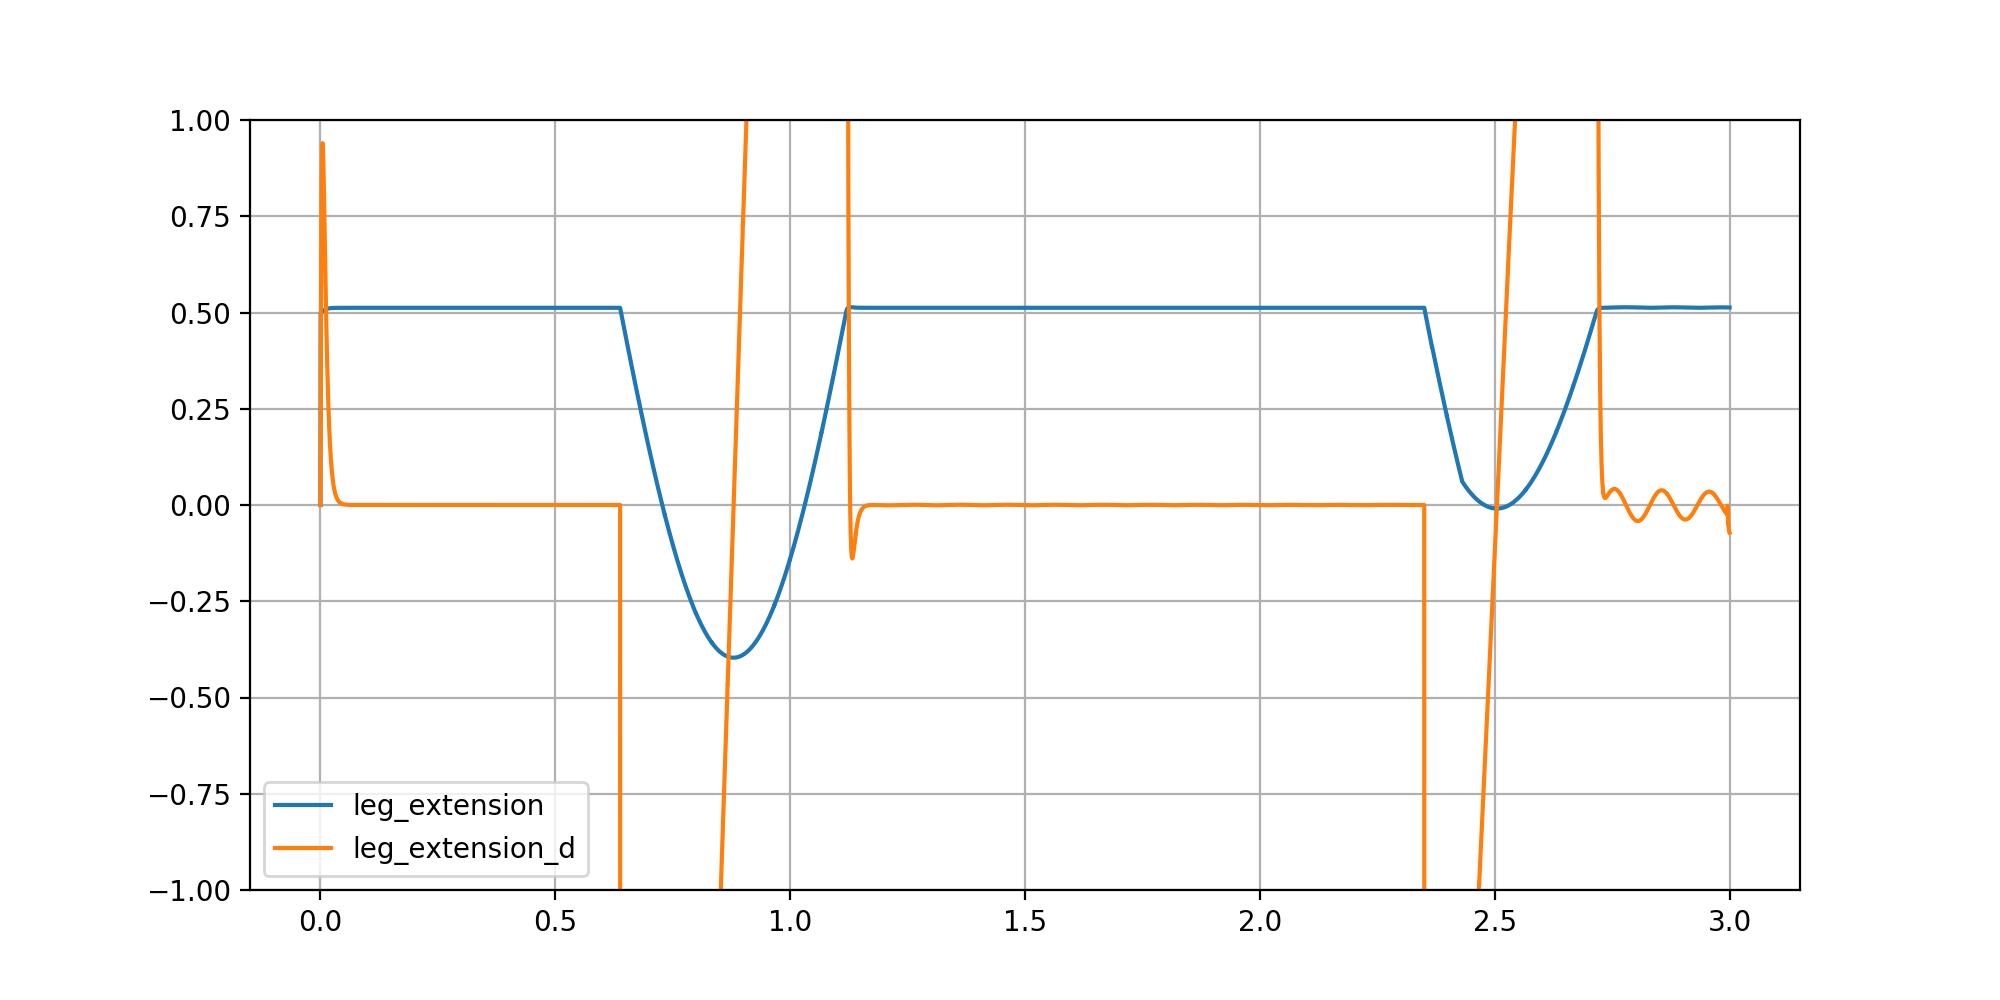

In [68]:
# Plot traces of certain states
plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[0, :])
plt.plot(state_log.sample_times(), state_log.data()[0+5, :])
plt.grid(True)
plt.legend(["body_x", "body_x_d"])

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[1, :])
plt.plot(state_log.sample_times(), state_log.data()[1+5, :])
plt.grid(True)
plt.legend(["body_z", "body_z_d"])

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[2, :])
plt.plot(state_log.sample_times(), state_log.data()[2+5, :])
plt.legend(["body_theta", "body_theta_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[3, :])
plt.plot(state_log.sample_times(), state_log.data()[3+5, :])
plt.legend(["alpha", "alpha_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), np.add(state_log.data()[2, :], state_log.data()[3, :]))
plt.plot(state_log.sample_times(), np.add(state_log.data()[2+5, :], state_log.data()[3+5, :]))
plt.legend(["beta", "beta_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[4, :])
plt.plot(state_log.sample_times(), state_log.data()[4+5, :])
plt.legend(["leg_extension", "leg_extension_d"])
plt.ylim([-1.0, 1.0])
plt.grid(True)
plt.show()
